In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       1.00      1.00      1.00        16
           2       0.96      1.00      0.98        22

    accuracy                           0.98        60
   macro avg       0.99      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



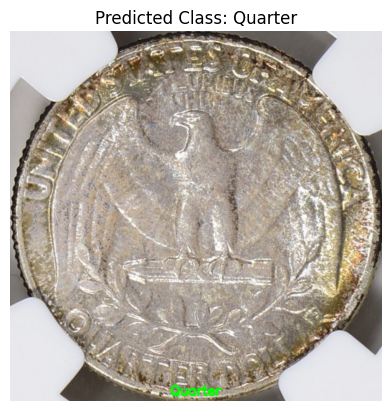

In [2]:
# Import necessary libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
import tensorflow as tf

# Function to extract features from an image
def extract_features(image):
    # Example: Using color histograms as features
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    features = hist.flatten()
    return features


# Function to predict the class of a new image and visualize results
def predict_and_visualize(image_path, classifier, label_encoder):
    image = cv2.imread(image_path)

    # Extract features
    features = extract_features(image)

    # Check if there are features (coins) detected
    if features.any():
        features = np.array(features).reshape(1, -1)  # Reshape for prediction
        prediction = classifier.predict(features)
        predicted_class = label_encoder.inverse_transform(prediction)[0]

        # Draw bounding box around the coin
        # cv2.rectangle(image, (0, 0), (image.shape[1], image.shape[0]), (0, 255, 0), 2)

        # Write the predicted class on the image
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.7
        font_thickness = 2
        text_size = cv2.getTextSize(predicted_class, font, font_scale, font_thickness)[0]
        text_x = int((image.shape[1] - text_size[0]) / 2)
        text_y = int(image.shape[0] - 10)
        cv2.putText(image, predicted_class, (text_x, text_y), font, font_scale, (0, 255, 0), font_thickness, cv2.LINE_AA)

        # Display the image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Predicted Class: ' + predicted_class)
        plt.axis('off')
        plt.show()
    else:
        print("Non Recognizable")

# Dataset path and class names (replace with your actual dataset information)
data_path = '/content/drive/MyDrive/Coins-Final/'
coin_classes = ['Cent', 'Nickel', 'Quarter']

# Prepare data and labels
data = []
labels = []

for coin_class in coin_classes:
    class_path = data_path + coin_class + '/'
    for filename in os.listdir(class_path):
        image_path = class_path + filename
        image = cv2.imread(image_path)
        features = extract_features(image)
        data.append(features)
        labels.append(coin_class)

# Convert data and labels to NumPy arrays
data = np.array(data)
labels = np.array(labels)

# Encode labels to numerical values
le = preprocessing.LabelEncoder()
labels_encoded = le.fit_transform(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels_encoded, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print('\nClassification Report:\n', classification_report(y_test, y_pred))

# Example: Predict the class and visualize the results for a new image
new_image_path = '/content/drive/MyDrive/Coins-test-Final/Quarter/Washington Quarter 72403_181 Reverse.jpg'
predict_and_visualize(new_image_path, classifier, le)